In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib64/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
imagegen = ImageDataGenerator(
    rotation_range = 50,
    fill_mode = 'constant',
    height_shift_range = 0.1,
    width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2
)

In [7]:
import glob
print (os.getcwd())
os.chdir("TRAINING/BENIGN")
benign_tumor_images = glob.glob("*.tif")
print (os.getcwd())
os.chdir("../MALIGNANT")
print (os.getcwd())
malignant_tumor_images = glob.glob("*.tif")

/home/ec2-user/Notebooks
/home/ec2-user/Notebooks/TRAINING/BENIGN
/home/ec2-user/Notebooks/TRAINING/MALIGNANT


In [8]:
print ("Number of malignant images:", len(malignant_tumor_images))
print ("Number of benign images:", len(benign_tumor_images))

Number of malignant images: 27
Number of benign images: 33


In [9]:
images = []
labels = []

for image_name in malignant_tumor_images:
    image_file = cv2.imread(image_name)
    if image_file is not None:
        image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
        image_file = scipy.misc.imresize(arr=image_file, size=(240, 320, 3))
        img_arr = np.asarray(image_file)
        images.append(img_arr)
        labels.append("MALIGNANT")
        
os.chdir("../BENIGN")

for image_name in benign_tumor_images:
    image_file = cv2.imread(image_name)
    if image_file is not None:
        image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
        image_file = scipy.misc.imresize(arr=image_file, size=(240, 320, 3))
        img_arr = np.asarray(image_file)
        images.append(img_arr)
        labels.append("BENIGN")
        
images = np.asarray(images)
labels = np.asarray(labels)


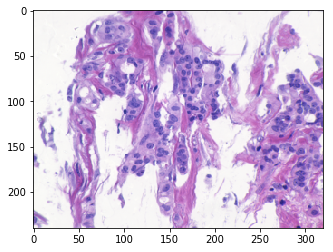

In [10]:
plt.imshow((images[5]))

In [12]:
benign_samples = images[np.where(labels=="BENIGN")]
malignant_samples = images[np.where(labels=="MALIGNANT")]

[[[[252 252 252]
   [253 252 251]
   [253 253 252]
   ..., 
   [119  69 173]
   [110  69 170]
   [108  71 170]]

  [[252 252 251]
   [253 252 251]
   [252 252 251]
   ..., 
   [ 64  45 135]
   [ 61  42 147]
   [ 85  52 156]]

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ..., 
   [ 63  46 126]
   [ 59  42 132]
   [ 63  43 143]]

  ..., 
  [[252 252 251]
   [252 253 251]
   [253 253 251]
   ..., 
   [211 138 203]
   [180 120 187]
   [138  83 176]]

  [[252 252 249]
   [252 253 250]
   [253 253 251]
   ..., 
   [198 142 194]
   [175 127 181]
   [145  95 177]]

  [[253 252 250]
   [253 252 251]
   [252 252 250]
   ..., 
   [188 150 191]
   [143 108 168]
   [115  78 168]]]


 [[[207 114 186]
   [211 118 188]
   [204 129 197]
   ..., 
   [168 104 184]
   [136  84 177]
   [125  83 189]]

  [[218 119 194]
   [211 125 197]
   [220 156 210]
   ..., 
   [ 90  59 149]
   [ 82  58 160]
   [116  78 188]]

  [[224 127 203]
   [217 140 210]
   [238 168 218]
   ..., 
   [ 66  48 142]
   [106  

In [13]:
print (os.getcwd())

/home/ec2-user/Notebooks/TRAINING/BENIGN


In [21]:
benign_generator = imagegen.flow(benign_samples,
                                labels[np.where(labels=="BENIGN")],
                                save_to_dir='../BENIGN',
                                batch_size=1)
malignant_generator = imagegen.flow(malignant_samples,
                                   labels[np.where(labels=="MALIGNANT")],
                                   save_to_dir='../MALIGNANT',
                                   batch_size=1)

In [22]:
image_generator = ImageDataGenerator()

In [ ]:
for i in range(2500):
    next(benign_generator)
    next(malignant_generator)